In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,5)

In [5]:
datacovid = pd.read_excel('datasetcovidjktid.xlsx',sheet_name='dataset')

datacovid.sample(5)

,Tanggal,Variant_Suspect,Day,ID_CUM_POSITIVE,ID_CUM_HOSPITALIZED,ID_CUM_CURED,ID_CUM_DEATH,JKT_CUM_POSITIVE,JKT_CUM_HOSPITALIZED,JKT_CUM_CURED,...,JKT_DAILY_ACTIVEPOSITIVE,JKT_DAILY_TESTED,JKT_DAILY_POSTEST,JKT_DAILY_NEGTEST,JKT_DAILY_POSTRATE,PoF,JKT_CONS_VALUE,CoF,Risk,Risk_Criteria
563,2021-09-15,Delta,136,4178164,84963,3953519,139682,855424,1066,838680,...,-79,14910.0,206.0,14704.0,0.013816,1.0,267.0,2.0,2.0,LOW
703,2022-02-02,Omicron,68,4387286,94109,4148804,144373,928875,8590,873212,...,5093,55471.0,13179.0,42292.0,0.237584,3.0,10309.0,3.0,9.0,HIGH
488,2021-07-02,Delta,61,2228938,267539,1901865,59534,560408,25380,473467,...,4374,24616.0,10485.0,14131.0,0.425942,3.0,11848.0,3.0,9.0,HIGH
555,2021-09-07,Delta,128,4140634,138630,3864848,137156,853171,1597,835030,...,-292,18285.0,308.0,17977.0,0.016844,1.0,207.0,2.0,2.0,LOW
522,2021-08-05,Delta,95,3568331,518310,2947646,102375,825657,4419,799151,...,-574,20398.0,2008.0,18390.0,0.098441,2.0,1662.0,3.0,6.0,HIGH


In [6]:
datacovid.describe(include="all")

C:\Users\mssul\AppData\Local\Temp\ipykernel_2436\547829457.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  datacovid.describe(include="all")


,Tanggal,Variant_Suspect,Day,ID_CUM_POSITIVE,ID_CUM_HOSPITALIZED,ID_CUM_CURED,ID_CUM_DEATH,JKT_CUM_POSITIVE,JKT_CUM_HOSPITALIZED,JKT_CUM_CURED,...,JKT_DAILY_ACTIVEPOSITIVE,JKT_DAILY_TESTED,JKT_DAILY_POSTEST,JKT_DAILY_NEGTEST,JKT_DAILY_POSTRATE,PoF,JKT_CONS_VALUE,CoF,Risk,Risk_Criteria
count,764,764,764.000000,7.640000e+02,764.000000,7.640000e+02,764.000000,7.640000e+02,764.000000,7.640000e+02,...,764.000000,762.000000,762.000000,762.000000,762.000000,724.000000,724.000000,724.000000,724.000000,724
unique,764,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,2020-03-01 00:00:00,Alpha-Beta-Gamma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIUM
freq,1,428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318
first,2020-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-04-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,159.421466,1.988810e+06,111822.445026,1.816104e+06,60883.447644,4.348129e+05,3787.302356,4.144274e+05,...,7.201571,13669.069554,1626.812336,12042.257218,0.100680,1.990331,1682.886740,2.000000,4.241713,NaN
std,NaN,NaN,117.517274,1.893727e+06,137334.691534,1.784478e+06,58582.141850,3.907569e+05,4896.242585,3.802968e+05,...,1812.790197,10291.694987,2630.895986,8373.963905,0.088335,0.636524,3038.689438,0.707596,2.437234,NaN
min,NaN,NaN,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,-12107.000000,3.000000,0.000000,3.000000,0.000000,1.000000,-1375.000000,1.000000,1.000000,NaN
25%,NaN,NaN,64.000000,1.992735e+05,18084.500000,1.423815e+05,8205.000000,4.855725e+04,1076.000000,3.619600e+04,...,-156.000000,7440.750000,147.250000,6541.500000,0.040962,2.000000,129.750000,1.750000,2.000000,NaN


<AxesSubplot:xlabel='Variant_Suspect', ylabel='JKT_DAILY_DEATH'>

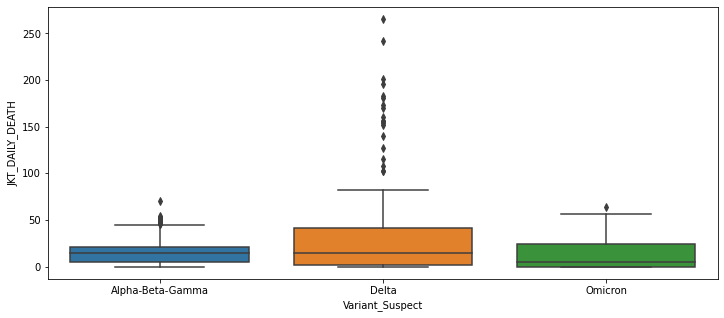

In [7]:
sns.boxplot(x="Variant_Suspect", y="JKT_DAILY_DEATH", data=datacovid)

<AxesSubplot:xlabel='Variant_Suspect', ylabel='count'>

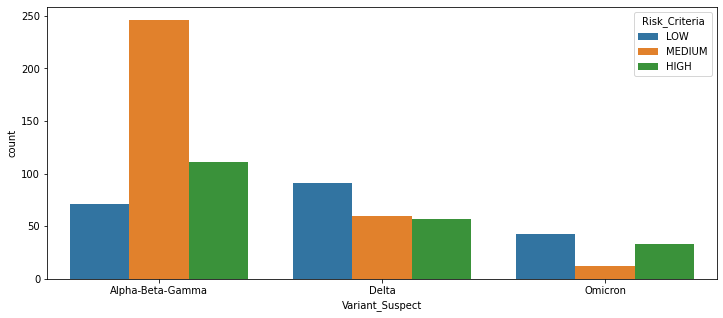

In [8]:
sns.countplot(x="Variant_Suspect", hue="Risk_Criteria", data=datacovid)

In [10]:
datacovid.columns

Index(['Tanggal', 'Variant_Suspect', 'Day', 'ID_CUM_POSITIVE',
       'ID_CUM_HOSPITALIZED', 'ID_CUM_CURED', 'ID_CUM_DEATH',
       'JKT_CUM_POSITIVE', 'JKT_CUM_HOSPITALIZED', 'JKT_CUM_CURED',
       'JKT_CUM_DEATH', 'JKT_CUM_SELFISOLATION', 'JKT_CUM_ACTIVEPOSITIVE',
       'ID_DAILY_POSITIVE', 'ID_DAILY_HOSPITALIZED', 'ID_DAILY_CURED',
       'ID_DAILY_DEATH', 'JKT_DAILY_DEATH', 'JKT_DAILY_CURED',
       'JKT_DAILY_ISOLATION', 'JKT_DAILY_HOSPITALIZED', 'JKT_DAILY_POSITIVE',
       'JKT_DAILY_ACTIVEPOSITIVE', 'JKT_DAILY_TESTED', 'JKT_DAILY_POSTEST',
       'JKT_DAILY_NEGTEST', 'JKT_DAILY_POSTRATE', 'PoF', 'JKT_CONS_VALUE',
       'CoF', 'Risk', 'Risk_Criteria'],
      dtype='object')

Text(0.5, 1.01, 'Pair Plot Covid Jakarta')

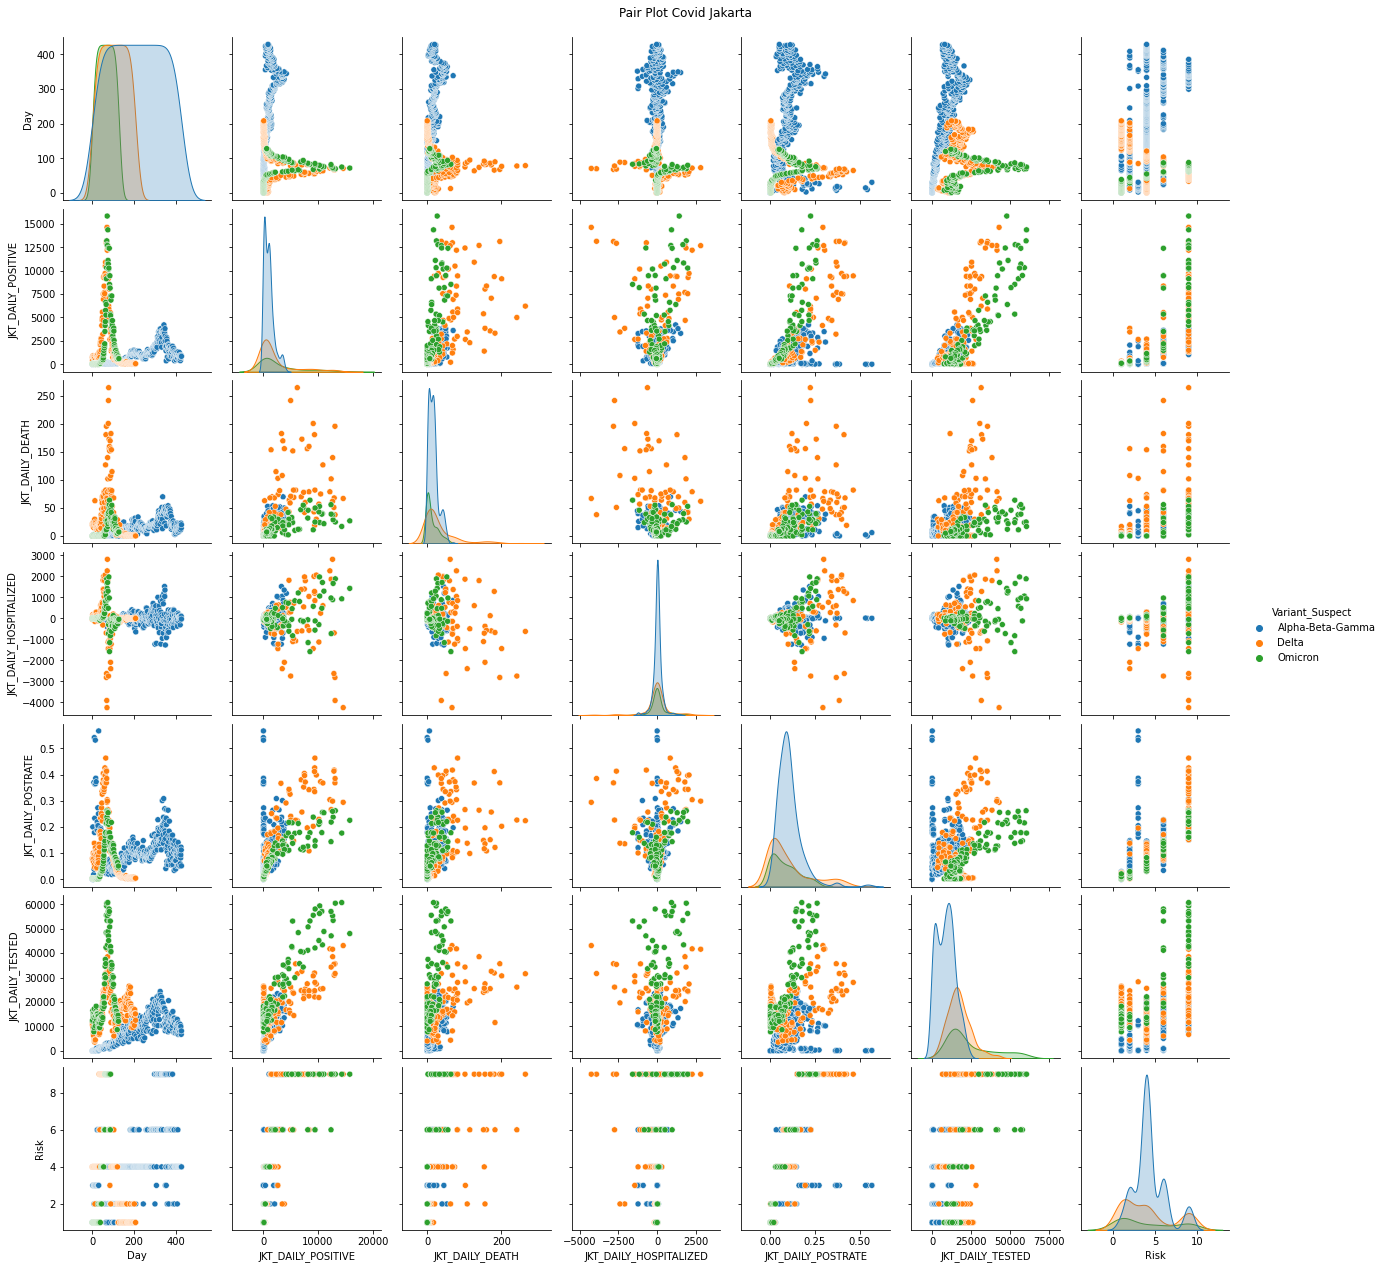

In [11]:
covid_JKT = datacovid.loc[:,['Variant_Suspect','Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]

sns.pairplot(covid_JKT,hue='Variant_Suspect').fig.suptitle("Pair Plot Covid Jakarta", y=1.01)

In [13]:
covid_ABG = datacovid.loc[datacovid.Variant_Suspect=='Alpha-Beta-Gamma',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]
covid_Delta = datacovid.loc[datacovid.Variant_Suspect=='Delta',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]
covid_Omicron = datacovid.loc[datacovid.Variant_Suspect=='Omicron',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]

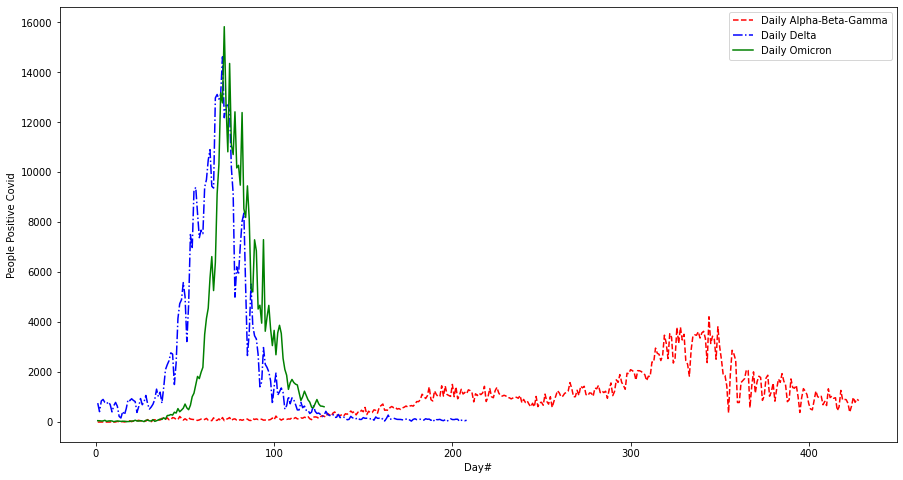

In [14]:
y1 = covid_ABG.JKT_DAILY_POSITIVE
y2 = covid_Delta.JKT_DAILY_POSITIVE
y3 = covid_Omicron.JKT_DAILY_POSITIVE

x1 = covid_ABG.Day
x2 = covid_Delta.Day
x3 = covid_Omicron.Day

plt.rcParams["figure.figsize"] = (15,8)
plt.plot(x1,y1,'--r',label="Daily Alpha-Beta-Gamma")
plt.plot(x2,y2,'-.b',label="Daily Delta")
plt.plot(x3,y3,'g', label="Daily Omicron")
plt.xlabel('Day#')
plt.ylabel('People Positive Covid')
plt.legend()
plt.show()

Text(0.5, 1.01, 'Pair Plot Covid Variant Omicron')

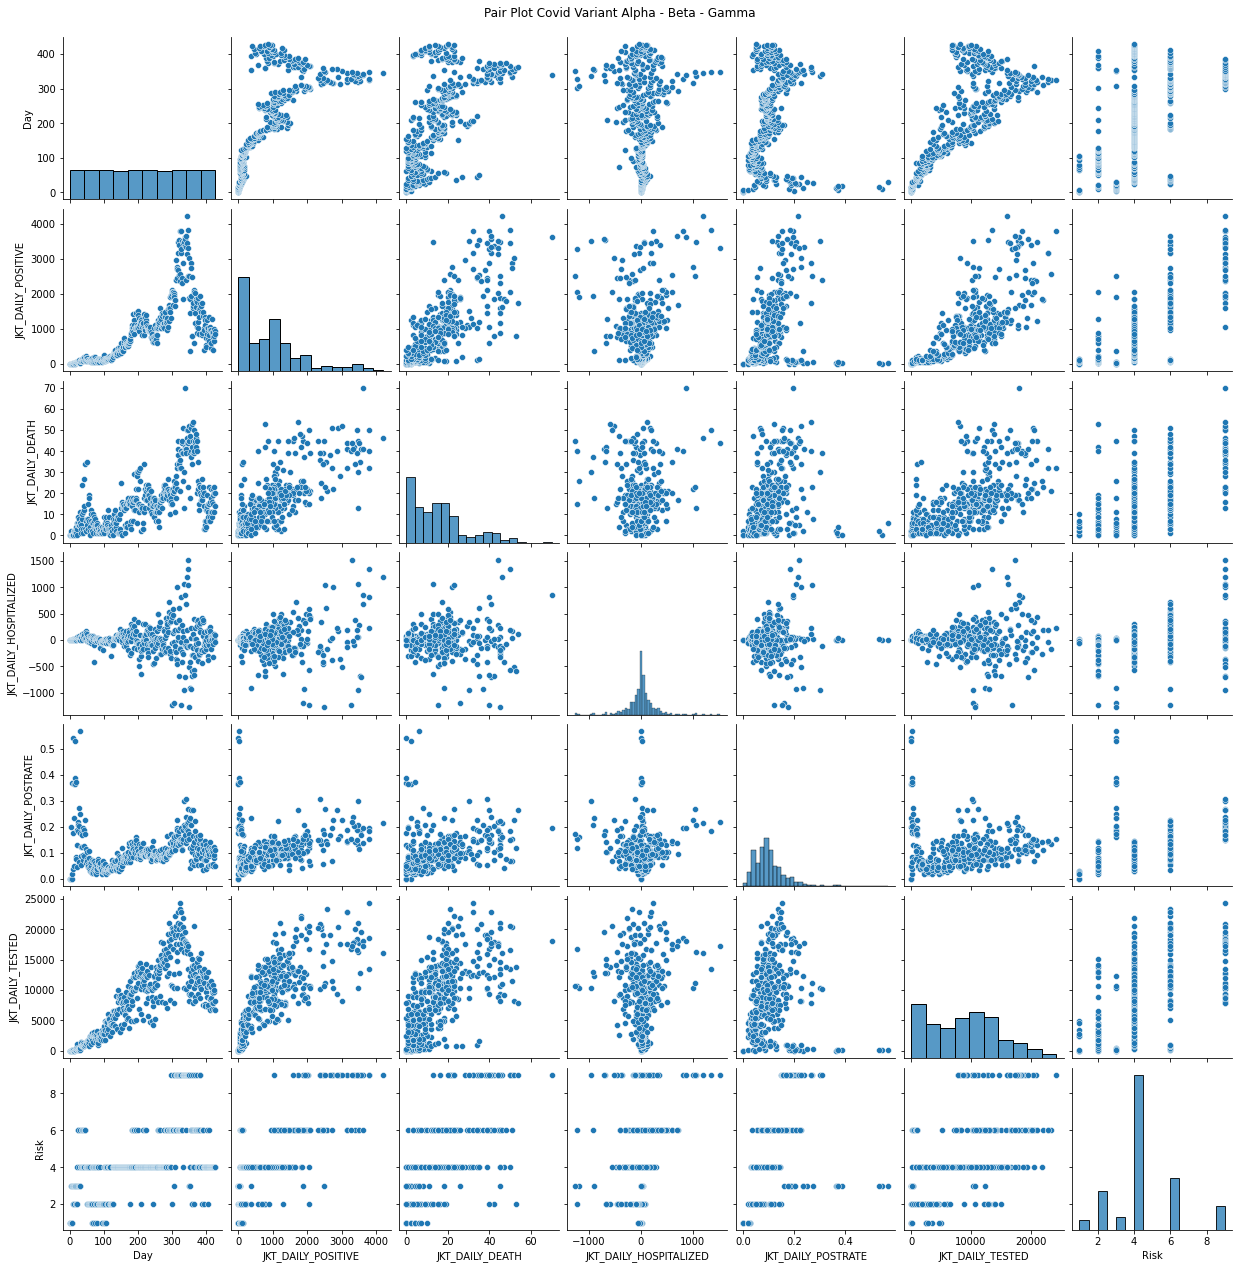

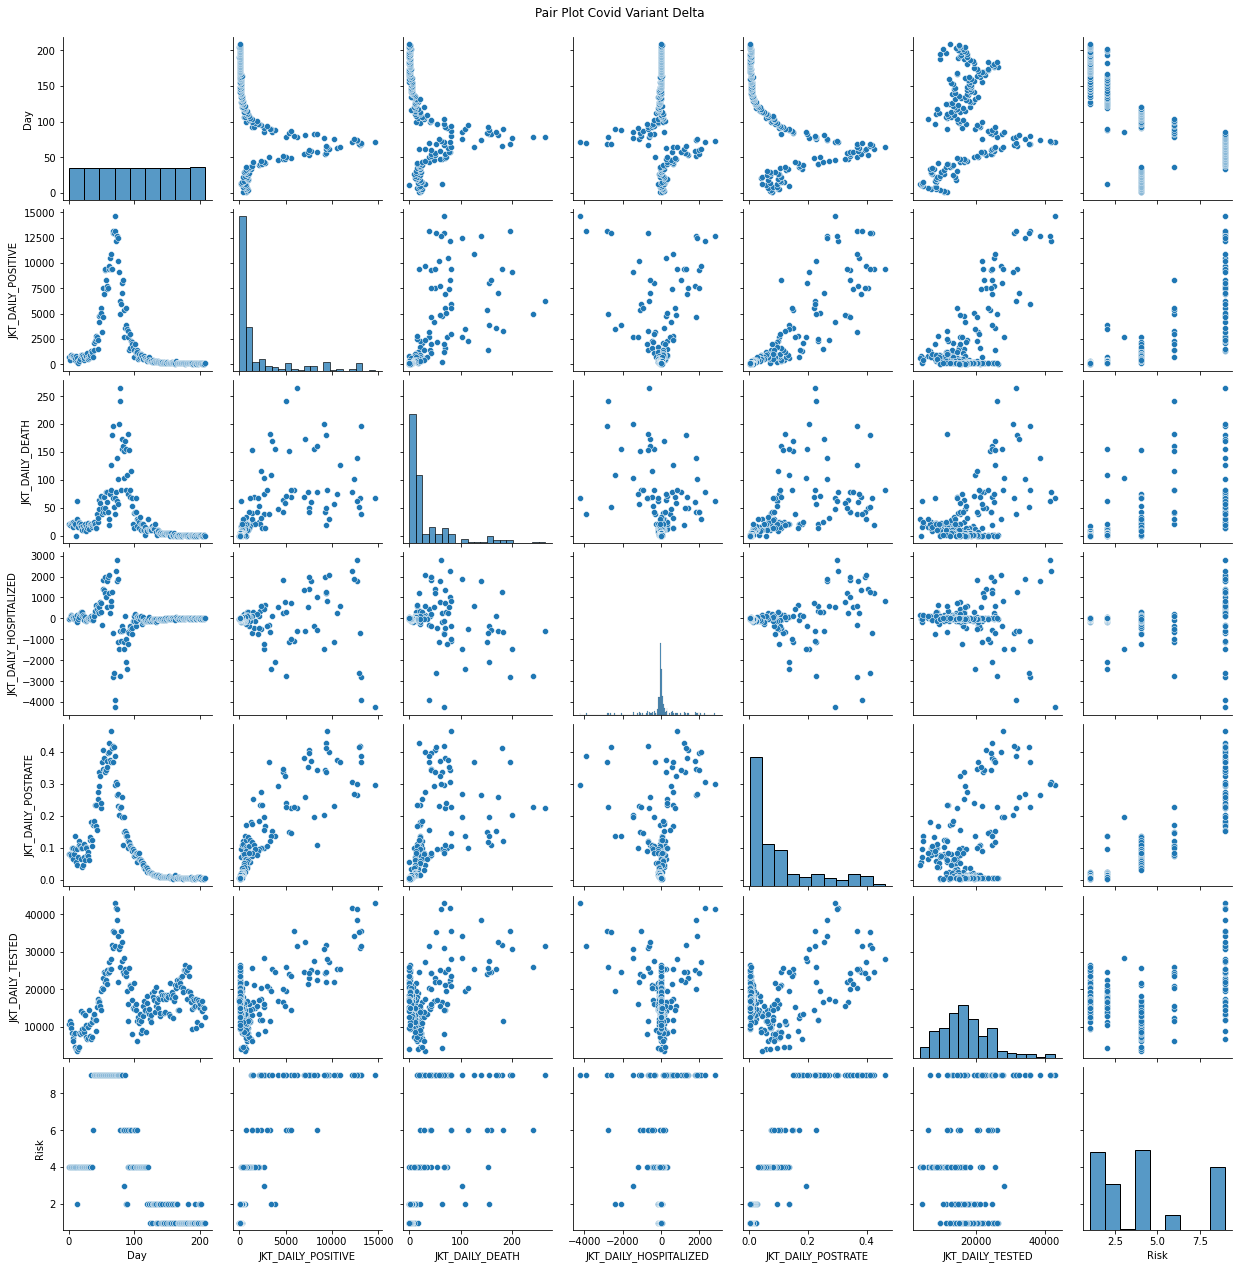

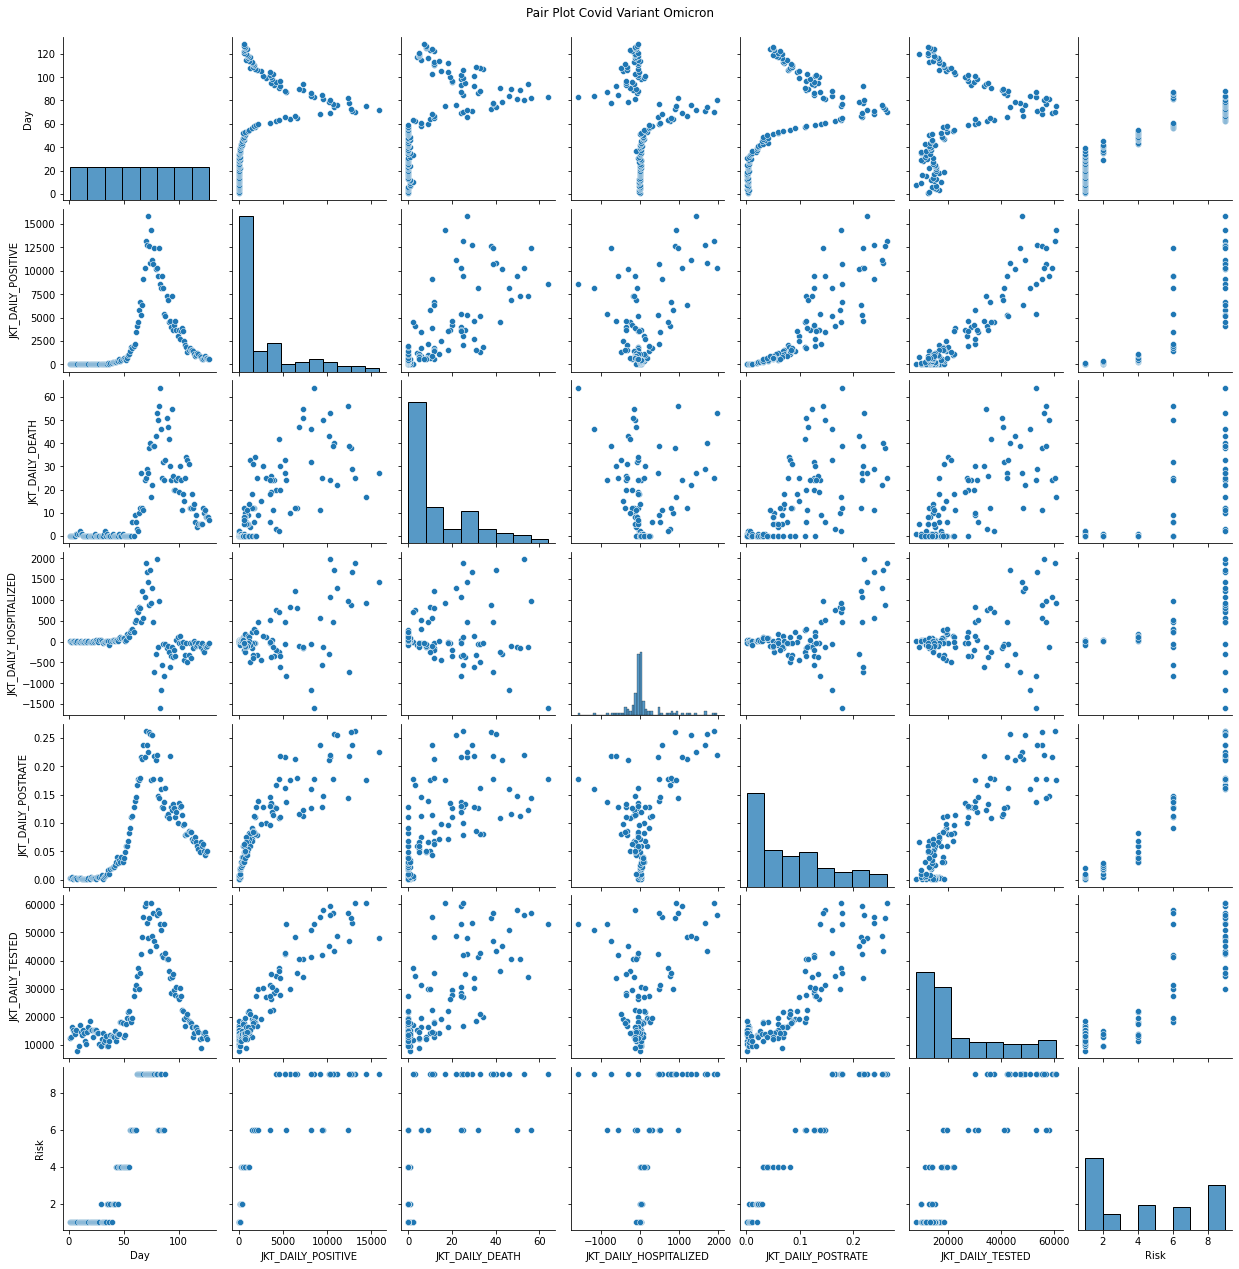

In [15]:
sns.pairplot(covid_ABG).fig.suptitle("Pair Plot Covid Variant Alpha - Beta - Gamma", y=1.01)
sns.pairplot(covid_Delta).fig.suptitle("Pair Plot Covid Variant Delta", y=1.01)
sns.pairplot(covid_Omicron).fig.suptitle("Pair Plot Covid Variant Omicron", y=1.01)

In [16]:
corrdata_ABG = covid_ABG.corr()

corrdata_ABG

,Day,JKT_DAILY_POSITIVE,JKT_DAILY_DEATH,JKT_DAILY_HOSPITALIZED,JKT_DAILY_POSTRATE,JKT_DAILY_TESTED,Risk
Day,1.000000,0.697578,0.633007,-0.025807,0.123077,0.760544,0.513156
JKT_DAILY_POSITIVE,0.697578,1.000000,0.774591,0.118637,0.326651,0.782815,0.769887
JKT_DAILY_DEATH,0.633007,0.774591,1.000000,-0.006659,0.292068,0.650004,0.637852
JKT_DAILY_HOSPITALIZED,-0.025807,0.118637,-0.006659,1.000000,0.032442,0.027089,0.313926
JKT_DAILY_POSTRATE,0.123077,0.326651,0.292068,0.032442,1.000000,0.082729,0.434880
JKT_DAILY_TESTED,0.760544,0.782815,0.650004,0.027089,0.082729,1.000000,0.536406
Risk,0.513156,0.769887,0.637852,0.313926,0.434880,0.536406,1.000000


<AxesSubplot:>

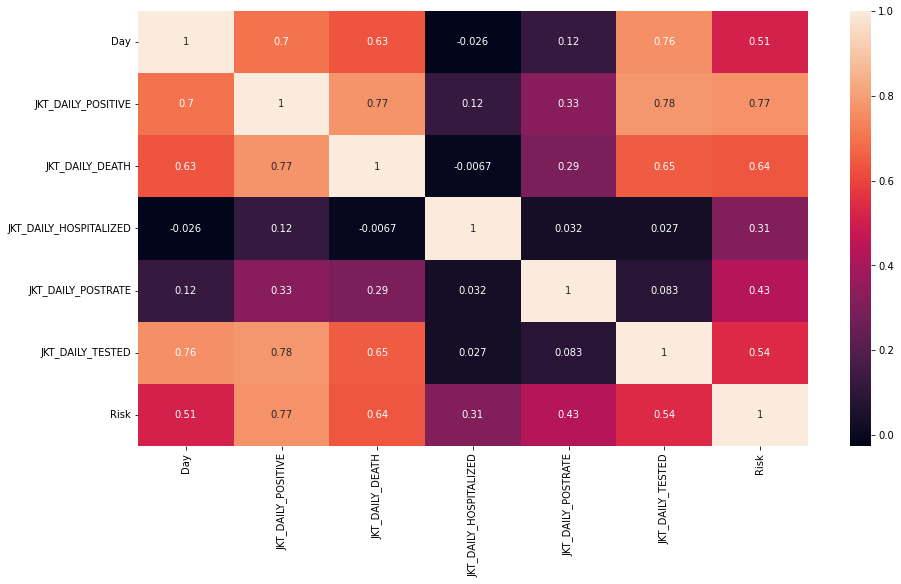

In [17]:
sns.heatmap(corrdata_ABG, annot=True)

In [18]:
corrdata_Delta = covid_Delta.corr()

corrdata_Delta

,Day,JKT_DAILY_POSITIVE,JKT_DAILY_DEATH,JKT_DAILY_HOSPITALIZED,JKT_DAILY_POSTRATE,JKT_DAILY_TESTED,Risk
Day,1.000000,-0.370518,-0.348633,-0.082729,-0.584683,0.177704,-0.669221
JKT_DAILY_POSITIVE,-0.370518,1.000000,0.642573,-0.000653,0.868112,0.694013,0.795194
JKT_DAILY_DEATH,-0.348633,0.642573,1.000000,-0.231899,0.571517,0.492677,0.599482
JKT_DAILY_HOSPITALIZED,-0.082729,-0.000653,-0.231899,1.000000,0.141326,-0.089613,0.150538
JKT_DAILY_POSTRATE,-0.584683,0.868112,0.571517,0.141326,1.000000,0.463248,0.908000
JKT_DAILY_TESTED,0.177704,0.694013,0.492677,-0.089613,0.463248,1.000000,0.346438
Risk,-0.669221,0.795194,0.599482,0.150538,0.908000,0.346438,1.000000


<AxesSubplot:>

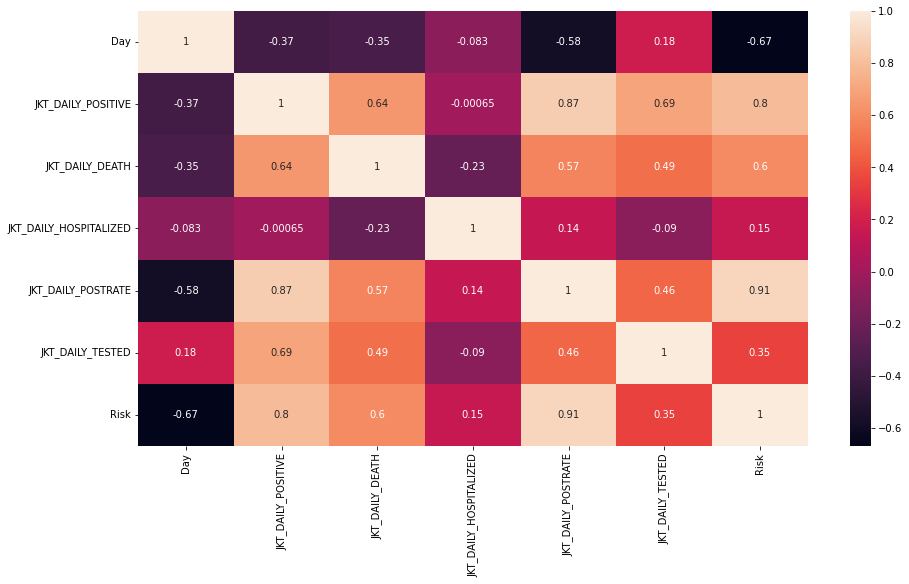

In [19]:
sns.heatmap(corrdata_Delta, annot=True)

In [20]:
corrdata_Omicron = covid_Omicron.corr()

corrdata_Omicron

,Day,JKT_DAILY_POSITIVE,JKT_DAILY_DEATH,JKT_DAILY_HOSPITALIZED,JKT_DAILY_POSTRATE,JKT_DAILY_TESTED,Risk
Day,1.000000,0.328029,0.522586,-0.099435,0.515209,0.315637,0.894876
JKT_DAILY_POSITIVE,0.328029,1.000000,0.761733,0.455146,0.886424,0.939722,0.855440
JKT_DAILY_DEATH,0.522586,0.761733,1.000000,0.030647,0.703548,0.766420,0.723489
JKT_DAILY_HOSPITALIZED,-0.099435,0.455146,0.030647,1.000000,0.446335,0.393869,0.460311
JKT_DAILY_POSTRATE,0.515209,0.886424,0.703548,0.446335,1.000000,0.888864,0.967249
JKT_DAILY_TESTED,0.315637,0.939722,0.766420,0.393869,0.888864,1.000000,0.881045
Risk,0.894876,0.855440,0.723489,0.460311,0.967249,0.881045,1.000000


<AxesSubplot:>

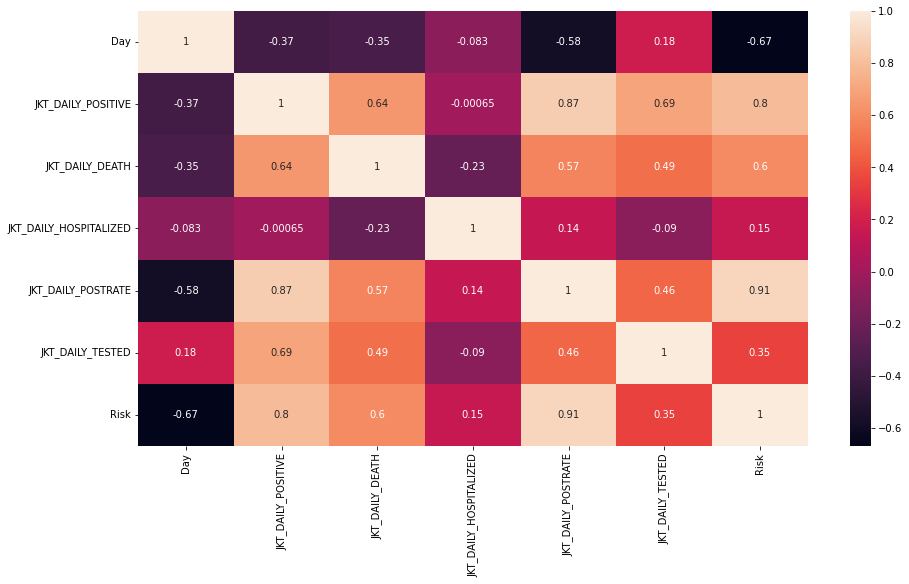

In [21]:
sns.heatmap(corrdata_Delta, annot=True)